In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os
import seaborn as sns

In [2]:
# Read CSVs
PatientConsumption = pd.read_csv('PatientConsumption 2018-2019.csv').drop_duplicates()
PurchasedOrders    = pd.read_csv('PurchasedOrders 2018-2019.csv').drop_duplicates()
IncompleteOrders   = pd.read_csv('IncompleteOrders 2018-2019.csv').drop_duplicates()
PatentDrugs        = pd.read_csv('PatentDrugs.csv').drop_duplicates()

# Retrieve date columns and apply to_datetime
date_columns = [column for column in PatientConsumption.columns if 'Date' in column]
PatientConsumption[date_columns] = PatientConsumption[date_columns].apply(pd.to_datetime)

date_columns = [column for column in PurchasedOrders.columns if 'Date' in column]
PurchasedOrders[date_columns] = PurchasedOrders[date_columns].apply(pd.to_datetime)

date_columns = [column for column in IncompleteOrders.columns if 'Date' in column]
IncompleteOrders[date_columns] = IncompleteOrders[date_columns].apply(pd.to_datetime)

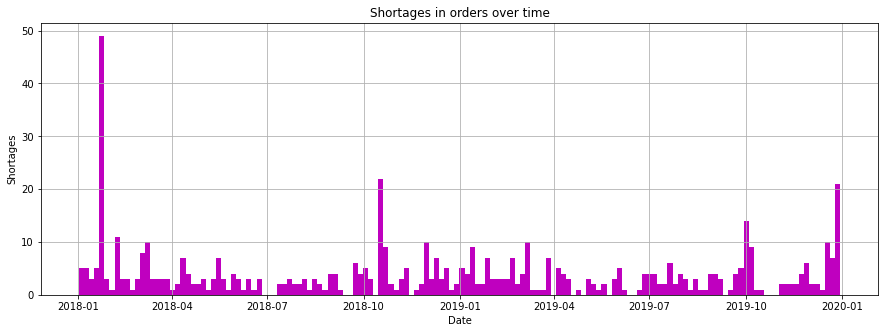

In [3]:
Shortages = PurchasedOrders[PurchasedOrders['AmountPurchased']==0]

plt.figure(figsize=(15, 5))
plt.hist(Shortages.RequestDate, bins = 150, facecolor='m')

plt.title('Shortages in orders over time')
plt.xlabel('Date')
plt.ylabel('Shortages')

plt.grid(True)
plt.show()

# Part 1
Merge the dictionary with the PurchasedOrders database to keep only the **patent** drugs

In [4]:
PurchasedOrders.head()

,RequestNumber,RequestDate,PurchaseNumber,OrderDate,RequiredDeliveryDate,SupplierName,MedCode,MedDescription,Outflow,AmountRequested,AmountPurchased
0,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,BOLENTAX (ENOXAPARINA) 40 MG/0.4 ML JER PRELL C/2,15.0,5.0,6
1,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304883,BOLENTAX (ENOXAPARINA) 60 MG/0.6 ML JER PRELL C/2,14.0,2.0,2
2,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304284,FRESUBIN PLUS VAINILLA 236 ML. FÓRMULA ENTERAL,15.0,5.0,5
3,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3302098,NODESCRON 4MG AMPOLLETA (VECURONIO) PISA,39.0,40.0,50
4,52670,2018-01-02,257785.0,2018-01-02,2018-01-03,"NADRO, S.A.P.I. DE C.V.",3301771,SOMAZINA 1G AMP 4ML (CITICOLINA),424.0,10.0,10


In [5]:
PatentDrugs['MedCode'] = PatentDrugs['MedCode'].astype(str)
PurchasedOrders['MedCode'] = PurchasedOrders['MedCode'].astype(str)
PatentOrders = pd.merge(PurchasedOrders, PatentDrugs, on='MedCode').drop(columns='MedDescription_x').rename(columns={'MedDescription_y':'MedDescription'})
PatentOrders

,RequestNumber,RequestDate,PurchaseNumber,OrderDate,RequiredDeliveryDate,SupplierName,MedCode,Outflow,AmountRequested,AmountPurchased,MedDescription,MedPharmacon,MedFamily
0,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,15.0,5.0,6,BOLENTAX 40MG/0.4ML C/2 JGP (ENOXAPARINA SODICA),BOLENTAX,Sangre y órganos hematopoyéticos
1,52734,2018-01-04,258004.0,2018-01-04,2018-01-05,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,19.0,2.0,2,BOLENTAX 40MG/0.4ML C/2 JGP (ENOXAPARINA SODICA),BOLENTAX,Sangre y órganos hematopoyéticos
2,52882,2018-01-15,258670.0,2018-01-15,2018-01-16,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,16.0,2.0,2,BOLENTAX 40MG/0.4ML C/2 JGP (ENOXAPARINA SODICA),BOLENTAX,Sangre y órganos hematopoyéticos
3,52950,2018-01-17,258882.0,2018-01-17,2018-01-18,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,13.0,2.0,2,BOLENTAX 40MG/0.4ML C/2 JGP (ENOXAPARINA SODICA),BOLENTAX,Sangre y órganos hematopoyéticos
4,52980,2018-01-19,259057.0,2018-01-19,2018-01-22,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,21.0,5.0,6,BOLENTAX 40MG/0.4ML C/2 JGP (ENOXAPARINA SODICA),BOLENTAX,Sangre y órganos hematopoyéticos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26890,65974,2019-12-18,314851.0,2019-12-18,2019-12-19,"NADRO, S.A.P.I. DE C.V.",3301175,1.0,1.0,1,CASODEX (BICALUTAMIDA) 50 MG TAB C/28,CASODEX,Antineoplásicos e inmunomoduladores
26891,66041,2019-12-23,315115.0,2019-12-23,2019-12-24,"NADRO, S.A.P.I. DE C.V.",3301341,3.0,3.0,3,ARLUY (MEBEVERINA) 200 MG CAP C/30,ARLUY,Tracto alimentario y metabolismo
26892,66041,2019-12-23,315118.0,2019-12-23,2019-12-24,"NADRO, S.A.P.I. DE C.V.",3305198,1.0,1.0,1,FESTOMAR 10/10 MG CAP CAJ C/30,FESTOMAR,Sistema respiratorio
26893,66048,2019-12-23,315137.0,2019-12-23,2019-12-24,FARMACOS NACIONALES S.A. DE C.V. (FANASA),3300906,1.0,1.0,1,HUMALOG 100UI C/2 CART (INSULINA LISPRO (ORIGE...,HUMALOG,Tracto alimentario y metabolismo


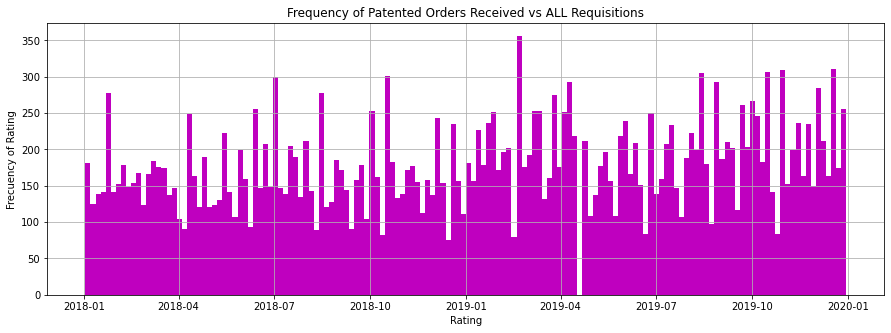

In [6]:
plt.figure(figsize=(15, 5))

plt.hist(PatentOrders.RequestDate, bins = 150, facecolor='m')

plt.title('Frequency of Patented Orders Received vs ALL Requisitions')
plt.xlabel('Rating')
plt.ylabel('Frecuency of Rating')
plt.grid(True)
plt.show()

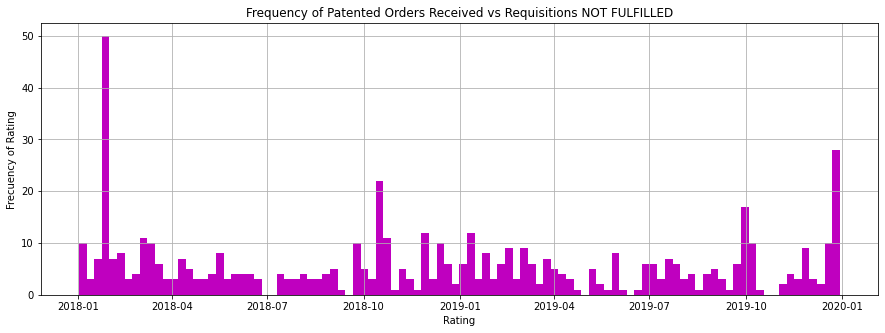

In [7]:
#NUMERO DE DESABASTOS
Shortages2 =PatentOrders[PatentOrders['AmountPurchased']==0]
plt.figure(figsize=(15, 5))
plt.hist(Shortages2.RequestDate, bins = 100, facecolor='m')
plt.title('Frequency of Patented Orders Received vs Requisitions NOT FULFILLED')
plt.xlabel('Rating')
plt.ylabel('Frecuency of Rating')
plt.grid(True)
plt.show()

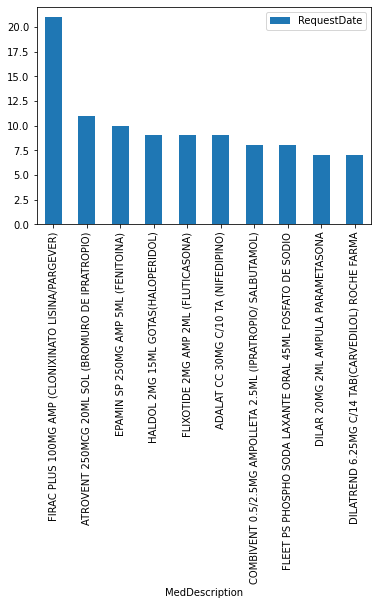

In [8]:
Shortages2.groupby('MedDescription').count().sort_values('RequestDate', ascending=False)[:10].reset_index().plot.bar(x='MedDescription', y='RequestDate')

In [9]:
Shortages2.groupby('MedDescription').sum().sort_values('AmountRequested', ascending=False).head(7)

,RequestNumber,PurchaseNumber,Outflow,AmountRequested,AmountPurchased
MedDescription,,,,,
COMBIVENT 0.5/2.5MG AMPOLLETA 2.5ML (IPRATROPIO/ SALBUTAMOL),480424,0.0,6703.0,1200.0,0
MEPROXIDINA 200MCG/2ML (DEXMEDETOMIDINA),385291,0.0,980.0,910.0,0
FIRAC PLUS 100MG AMP (CLONIXINATO LISINA/PARGEVER),1258644,0.0,2775.0,543.0,0
CORPOTASIN CL C/50 TAB AMSTRONG,52984,0.0,413.0,413.0,0
FLIXOTIDE 2MG AMP 2ML (FLUTICASONA),593804,0.0,61.0,140.0,0
FALOT 1G AMP. PISA (CEFALOTINA),321705,0.0,50.0,130.0,0
AMPLIUM 1G AMP IV (MEROPENEM),106284,0.0,186.0,100.0,0


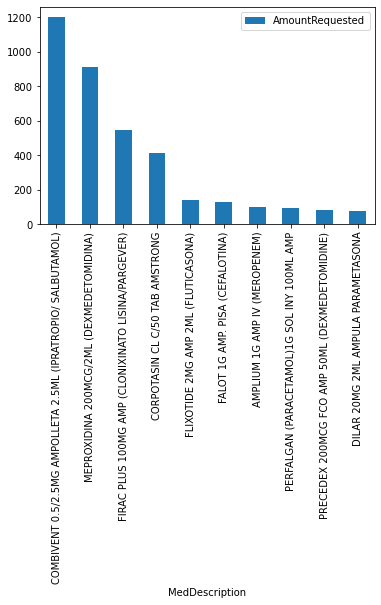

In [10]:
Shortages2.groupby('MedDescription').sum().sort_values('AmountRequested', ascending=False)[:10].reset_index().plot.bar(x='MedDescription', y='AmountRequested')

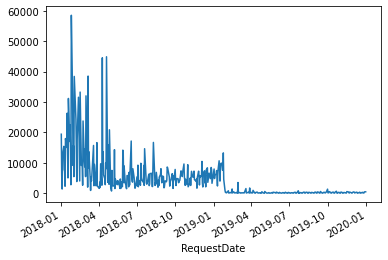

In [11]:
PatentOrders.groupby('RequestDate').sum()['Outflow'].plot()
#PREGUNTAR A JULIO

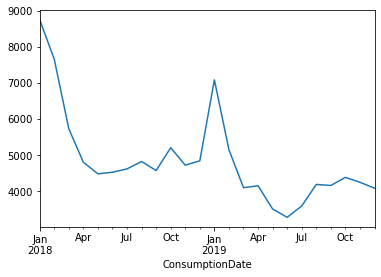

In [12]:
#CANTIDAD PEDIDA POR LOS PACIENTES
PatientConsumption.groupby('ConsumptionDate').sum()['AmmountConsumed'].plot()

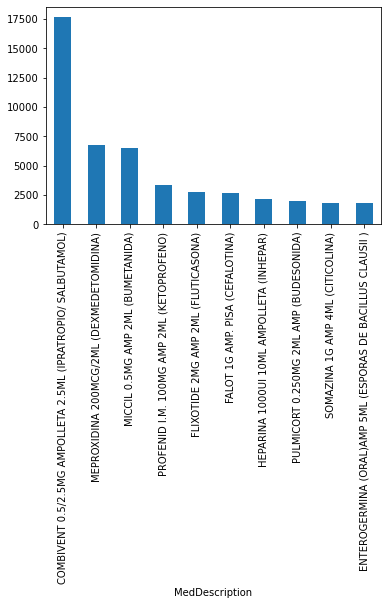

In [13]:
# Los que mas se compran
PatentOrders.groupby('MedDescription').sum().sort_values('AmountRequested', ascending=False)[:10]['AmountRequested'].plot.bar()

In [14]:
# Los que mas se demandan
top10_c= PatientConsumption.groupby('MedDescription').sum().sort_values('AmmountConsumed',ascending=False)[:10].reset_index()
top10_c

,MedDescription,ConsumptionNumber,MedCode,AmmountConsumed,UnitaryCost,TotalCost
0,COMBIVENT 0.5/2.5MG AMPOLLETA 2.5ML (IPRATROPI...,8.135285e+10,4.812319e+10,16997.0,443372.20,517482.09
1,MICCIL 0.5MG AMP 2ML (BUMETANIDA),2.879226e+10,1.663857e+10,7235.0,79875.48,116150.01
2,FLIXOTIDE 2MG AMP 2ML (FLUTICASONA),1.566442e+10,9.169038e+09,2843.0,126029.59,129145.96
3,PULMICORT 0.250MG 2ML AMP (BUDESONIDA),1.245980e+10,7.805417e+09,2484.0,72048.02,75560.64
4,PROFENID IM (KETOPROFENO) 100MG/2ML AMP,1.339354e+10,7.507230e+09,2281.0,161678.22,162263.89
5,ENTEROGERMINA (ORAL)AMP 5ML (ESPORAS DE BACILL...,6.539944e+09,3.822669e+09,1949.0,15994.96,26997.81
6,SOMAZINA 1G AMP 4ML (CITICOLINA),1.027621e+10,5.929981e+09,1852.0,126801.89,130868.65
7,DICYNONE 250MG AMP 2ML (ETAMSILATO),7.821405e+09,4.528975e+09,1654.0,136554.01,165263.47
8,HEPARINA 1000UI 10ML AMPOLLETA (INHEPAR),7.741466e+09,4.487607e+09,1605.0,73787.49,86787.09
9,FOSFOCIL IV 1G AMP (FOSFOMICINA),8.170725e+09,4.718552e+09,1513.0,180634.15,191124.91


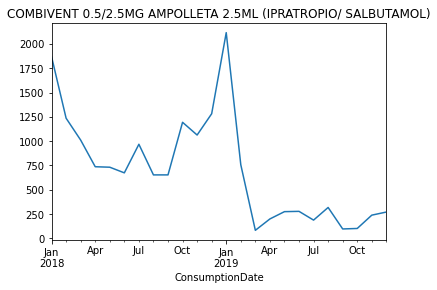

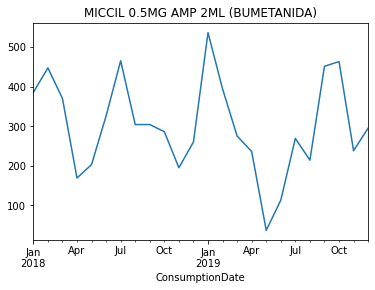

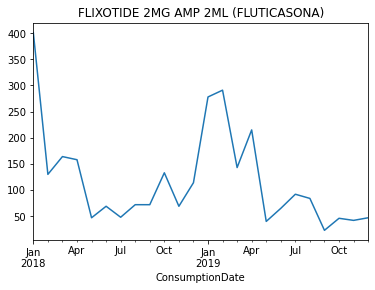

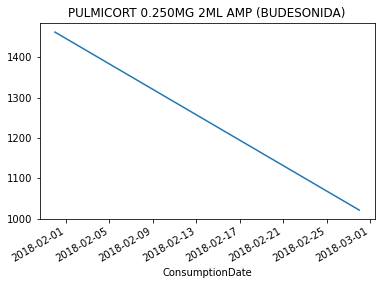

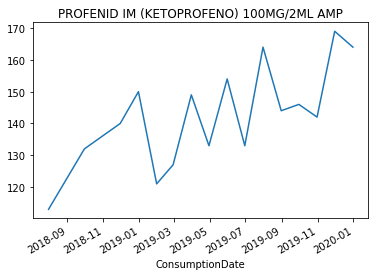

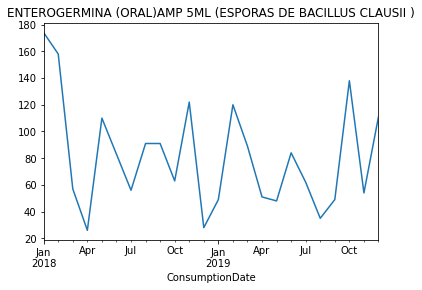

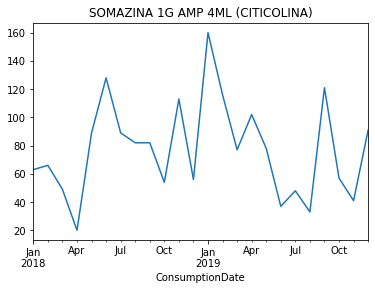

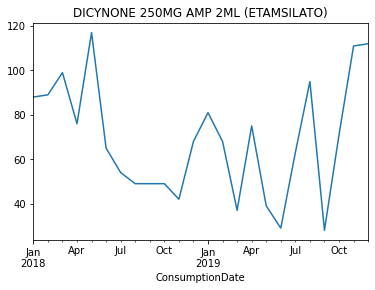

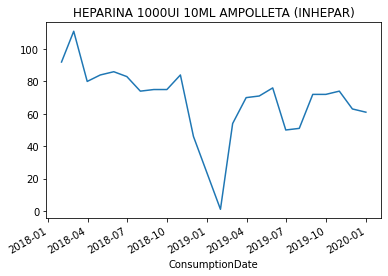

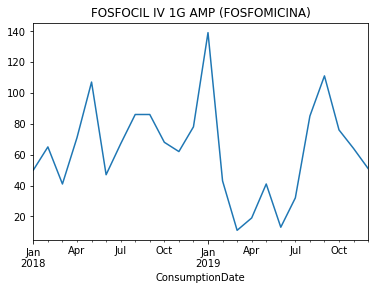

In [15]:
for i in top10_c['MedDescription']:
    plt.figure()
    PatientConsumption[PatientConsumption['MedDescription']==i].groupby('ConsumptionDate').sum()['AmmountConsumed'].plot()
    plt.title(i)

In [16]:
#GRAFICO DEL TIEMPO DE LOS MEDICAMENTOS VENDIDOS
#CALCULAR LA UTILIDAD DE LOS MEDICAMENTOS Y CUANTIFICARLA COMO COSTO DE OPORTUNIDAD DEL DESABASTO
#Proveedores a los que más se les compra

In [17]:
#VECES QUE FALTO COMO RAZÓN DEL TOTAL QUE SE PIDIÓ
veces_pedida=pd.DataFrame(PatentOrders.groupby('MedDescription').count()['RequestNumber']).sort_values('RequestNumber',ascending=False)[0:100].reset_index()
veces_faltante=pd.DataFrame(PatentOrders[PatentOrders['AmountPurchased']==0].groupby('MedDescription').count()['RequestDate']).reset_index()

veces_falto=pd.merge(veces_faltante,veces_pedida,on='MedDescription')
veces_falto['cociente']=veces_falto['RequestDate']/veces_falto['RequestNumber']
veces_falto.sort_values('cociente', ascending=False).reset_index(drop=True)[:15]

,MedDescription,RequestDate,RequestNumber,cociente
0,FLEET ENEMA AD LAB FOSF-SODIO 133ML SOL (FOSFA...,6,62,0.096774
1,ACTRON 400 400MG C/10 CAP (IBUPROFENO) LAB. BA...,7,73,0.095890
2,NIMOTOP 10MG AMP 50ML (NIMODIPINO),6,67,0.089552
3,FLIXOTIDE 2MG AMP 2ML (FLUTICASONA),9,144,0.062500
4,RENEGY 500MG/10ML AMP IV (CARBOXIMALTOSA FERRICA),5,81,0.061728
5,CUBICINE 500 MG AMP IV (DAPTOMICINA),5,87,0.057471
6,ATROVENT 250MCG 20ML SOL (BROMURO DE IPRATROPIO),11,242,0.045455
7,MEPROXIDINA 200MCG/2ML (DEXMEDETOMIDINA),6,134,0.044776
8,LIPITOR 80MG C/30 TAB(ATORVASTATINA),3,67,0.044776
9,HALOPERIL 5MG/ML AMP IM (HALOPERIDOL),4,97,0.041237


In [18]:
PatentOrders.groupby('MedFamily').count().sort_values('RequestDate', ascending=False)

,RequestNumber,RequestDate,PurchaseNumber,OrderDate,RequiredDeliveryDate,SupplierName,MedCode,Outflow,AmountRequested,AmountPurchased,MedDescription,MedPharmacon
MedFamily,,,,,,,,,,,,
Tracto alimentario y metabolismo,5291,5291,5212,5212,5212,5212,5291,5291,5291,5291,5291,5291
Sistema cardiovascular,3629,3629,3567,3567,3567,3567,3629,3629,3629,3629,3629,3629
No encontrado,2803,2803,2710,2710,2710,2710,2803,2803,2803,2803,2803,2803
Antiinfecciosos para uso sistémico,2743,2743,2689,2689,2689,2689,2743,2743,2743,2743,2743,2743
Sistema nervioso,2712,2712,2634,2634,2634,2634,2712,2712,2712,2712,2712,2712
Sistema musculoesquelético,2600,2600,2565,2565,2565,2565,2600,2600,2600,2600,2600,2600
Sistema respiratorio,2343,2343,2293,2293,2293,2293,2343,2343,2343,2343,2343,2343
Sangre y órganos hematopoyéticos,1316,1316,1289,1289,1289,1289,1316,1316,1316,1316,1316,1316
"Preparados hormonales sistémicos, excluyendo hormonas sexuales e insulinas",1052,1052,1026,1026,1026,1026,1052,1052,1052,1052,1052,1052


In [19]:
top10_c= PatentOrders.groupby('MedFamily').sum().sort_values('AmountRequested',ascending=False)[:10].reset_index()
top10_c

,MedFamily,RequestNumber,PurchaseNumber,Outflow,AmountRequested,AmountPurchased
0,Sistema respiratorio,139960456,6.596706e+08,348894.00,26853.00,24926
1,Sistema nervioso,161875053,7.578505e+08,230362.00,16282.00,14466
2,Sistema cardiovascular,216562957,1.025687e+09,262055.00,14688.00,14688
3,Antiinfecciosos para uso sistémico,164170066,7.750545e+08,174144.00,14549.00,12537
4,Sistema musculoesquelético,154369364,7.340561e+08,274553.00,14511.00,14490
5,Tracto alimentario y metabolismo,317238407,1.505814e+09,329760.50,13887.50,13352
6,No encontrado,167210176,7.789211e+08,220843.04,9629.04,8234
7,Sangre y órganos hematopoyéticos,78813302,3.720648e+08,57712.00,6099.00,6368
8,Varios,20622230,9.362117e+07,17841.00,2750.00,2492
9,"Preparados hormonales sistémicos, excluyendo h...",63076622,2.962055e+08,48061.00,2702.00,2523


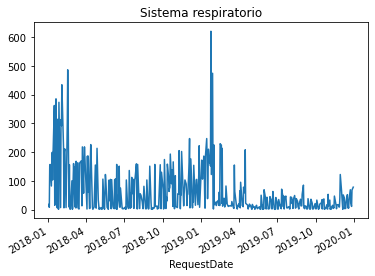

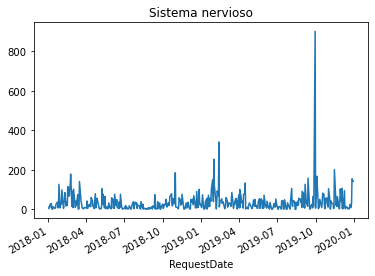

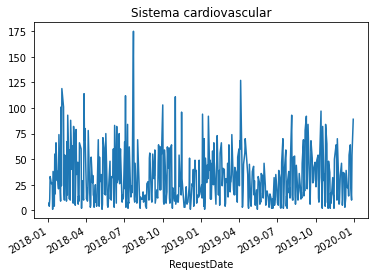

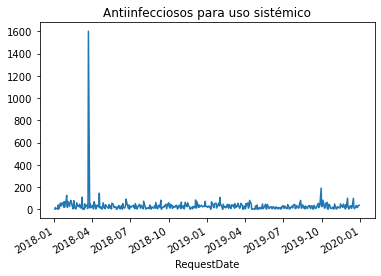

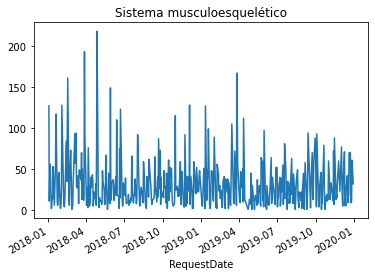

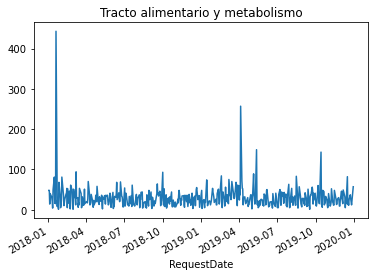

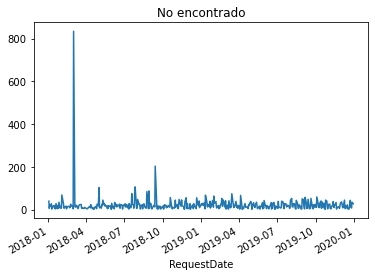

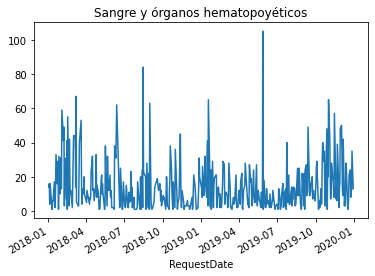

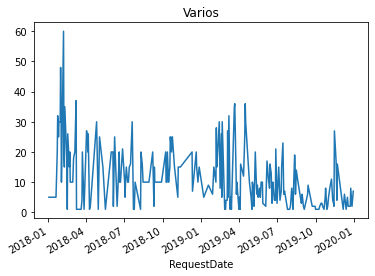

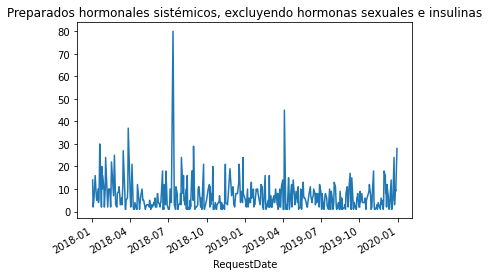

In [20]:
for i in top10_c['MedFamily']:
    plt.figure()
    PatentOrders[PatentOrders['MedFamily']==i].groupby('RequestDate').sum()['AmountRequested'].plot()
    plt.title(i)

_____________

In [21]:
  # All IncompleteOrders with RequestNumber'== are missing in PurchasedOrders
IncompleteOrders[~IncompleteOrders['RequestNumber'].isin(PurchasedOrders['RequestNumber'])].equals(IncompleteOrders[IncompleteOrders['RequestNumber']==0])

True

In [22]:
IncompleteOrders[IncompleteOrders['RequestNumber']!=0]

,SupplierName,OrderNumber,OrderDate,RequiredDeliveryDate,RequestNumber,RequestDate,CostCenter,MedCode,MedDescription,InvoiceNumber,ReceivedDate,AmountRequested,AmountPurchased,AmountReceived,OrderPercentageFulfillment
14,"CENTRO MEDICO FARMACIA, S.A. DE C.V.",268691.0,2018-05-24,2018-05-25,55356.0,2018-05-24,MEDICAMENTOS,3301205,BUSCAPINA (HIOSCINA) 20 MG/ML AMP,NaN,NaT,6.0,6.0,0,0.0
15,COMERCIALIZADORA FARMACEUTICA DE CHIAPAS S.A. ...,271782.0,2018-07-03,2018-07-04,56111.0,2018-07-03,MEDICAMENTOS,3301205,BUSCAPINA (HIOSCINA) 20 MG/ML AMP,NaN,NaT,6.0,6.0,0,0.0
16,COMERCIALIZADORA FARMACEUTICA DE CHIAPAS S.A. ...,272239.0,2018-07-05,2018-07-06,56157.0,2018-07-05,MEDICAMENTOS,3301205,BUSCAPINA (HIOSCINA) 20 MG/ML AMP,NaN,NaT,6.0,6.0,0,0.0
17,COMERCIALIZADORA FARMACEUTICA DE CHIAPAS S.A. ...,272240.0,2018-07-05,2018-07-06,56159.0,2018-07-05,MEDICAMENTOS,3302662,NASALUB ADU SOL HUMEC 30ML NASAL(CLORURO DE SO...,NaN,NaT,1.0,5.0,0,0.0
18,COMERCIALIZADORA FARMACEUTICA DE CHIAPAS S.A. ...,272273.0,2018-07-06,2018-07-09,56169.0,2018-07-06,MEDICAMENTOS,3301205,BUSCAPINA (HIOSCINA) 20 MG/ML AMP,NaN,NaT,6.0,9.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,SOLUCIONES TECNICAS PARA LA SALUD S.A. DE C.V....,308521.0,2019-10-09,2019-10-10,64611.0,2019-10-09,MEDICAMENTOS,3300767,TETANOGAMA 250UI AMP,NaN,NaT,7.0,20.0,0,0.0
2150,SOLUCIONES TECNICAS PARA LA SALUD S.A. DE C.V....,315138.0,2019-12-23,2019-12-24,66048.0,2019-12-23,MEDICAMENTOS,3300767,TETANOGAMA 250UI AMP,NaN,NaT,7.0,10.0,0,0.0
2152,"VITASANITAS, S.A. DE C.V.",289309.0,2019-02-11,2019-02-18,60119.0,2019-02-11,BANCO SANGRE,3800003,ALBUMINA HUMANA AL 20% FCO 50ML,NaN,NaT,10.0,10.0,0,0.0
2153,"VITASANITAS, S.A. DE C.V.",290411.0,2019-02-22,2019-02-25,60340.0,2019-02-22,BANCO SANGRE,3800003,ALBUMINA HUMANA AL 20% FCO 50ML,NaN,NaT,10.0,10.0,0,0.0


In [23]:
PurchasedOrders['MedCode'] = PurchasedOrders['MedCode'].astype(int)
PurchasedOrders

,RequestNumber,RequestDate,PurchaseNumber,OrderDate,RequiredDeliveryDate,SupplierName,MedCode,MedDescription,Outflow,AmountRequested,AmountPurchased
0,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,BOLENTAX (ENOXAPARINA) 40 MG/0.4 ML JER PRELL C/2,15.0,5.0,6
1,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304883,BOLENTAX (ENOXAPARINA) 60 MG/0.6 ML JER PRELL C/2,14.0,2.0,2
2,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304284,FRESUBIN PLUS VAINILLA 236 ML. FÓRMULA ENTERAL,15.0,5.0,5
3,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3302098,NODESCRON 4MG AMPOLLETA (VECURONIO) PISA,39.0,40.0,50
4,52670,2018-01-02,257785.0,2018-01-02,2018-01-03,"NADRO, S.A.P.I. DE C.V.",3301771,SOMAZINA 1G AMP 4ML (CITICOLINA),424.0,10.0,10
...,...,...,...,...,...,...,...,...,...,...,...
26890,66154,2019-12-30,315631.0,2019-12-30,2019-12-31,FARMACOS NACIONALES S.A. DE C.V. (FANASA),3300627,NEPRO HP 236 ML VAINILLA,5.0,5.0,5
26891,66154,2019-12-30,315631.0,2019-12-30,2019-12-31,FARMACOS NACIONALES S.A. DE C.V. (FANASA),3300046,PEDIALYTE SR-45 500ML,2.0,2.0,2
26892,66154,2019-12-30,315631.0,2019-12-30,2019-12-31,FARMACOS NACIONALES S.A. DE C.V. (FANASA),3301771,SOMAZINA 1G AMP 4ML (CITICOLINA),13.0,10.0,10
26893,66156,2019-12-30,315563.0,2019-12-30,2019-12-31,LUZ DEL CARMEN PEREZ OLAVARRIA (DIEMED),3305053,GI DEXMEDETOMIDINA 200MCG/2ML,110.0,110.0,110


In [24]:
#columns = list(np.intersect1d(IncompleteOrders.columns,PurchasedOrders.columns))
#PurchasedOrders.merge(IncompleteOrders, on=columns, how='right')
columns = ['AmountPurchased', 'AmountRequested', 'MedCode','OrderDate', 'RequestDate', 'RequestNumber','RequiredDeliveryDate', 'SupplierName']

#temp_df = PurchasedOrders.reset_index().merge(IncompleteOrders[IncompleteOrders['RequestNumber']!=0], on=columns, how='left').set_index('index')
temp_df = IncompleteOrders[IncompleteOrders['RequestNumber']!=0].reset_index().merge(PurchasedOrders, on=columns, how='left').set_index('index')
rep = list(temp_df.groupby('index').count().sort_values('SupplierName', ascending=False).head(5).index)
temp_df.loc[rep,:]

,SupplierName,OrderNumber,OrderDate,RequiredDeliveryDate,RequestNumber,RequestDate,CostCenter,MedCode,MedDescription_x,InvoiceNumber,ReceivedDate,AmountRequested,AmountPurchased,AmountReceived,OrderPercentageFulfillment,PurchaseNumber,MedDescription_y,Outflow
index,,,,,,,,,,,,,,,,,,
1556,"NADRO, S.A.P.I. DE C.V.",288884.0,2019-02-05,2019-02-08,59991.0,2019-02-05,MEDICAMENTOS,3302247,ILOSONE 125MG 120ML SUSPENCION(ERITROMICINA),NaN,NaT,2.0,1.0,0,0.0,288775.0,ILOSONE 125MG 120ML SUSPENCION(ERITROMICINA),1.0
1556,"NADRO, S.A.P.I. DE C.V.",288884.0,2019-02-05,2019-02-08,59991.0,2019-02-05,MEDICAMENTOS,3302247,ILOSONE 125MG 120ML SUSPENCION(ERITROMICINA),NaN,NaT,2.0,1.0,0,0.0,288884.0,ILOSONE 125MG 120ML SUSPENCION(ERITROMICINA),1.0
2137,"SERVICIOS OPERACIONALES BENAVIDES, S.A. DE C.V.",309247.0,2019-10-17,2019-10-18,64731.0,2019-10-16,MEDICAMENTOS,3302093,ATROVENT (BROMURO DE IPRATROPIO) 250 MICROGRAM...,NaN,NaT,8.0,1.0,0,0.0,309247.0,ATROVENT (BROMURO DE IPRATROPIO) 250 MICROGRAM...,3.0
2137,"SERVICIOS OPERACIONALES BENAVIDES, S.A. DE C.V.",309247.0,2019-10-17,2019-10-18,64731.0,2019-10-16,MEDICAMENTOS,3302093,ATROVENT (BROMURO DE IPRATROPIO) 250 MICROGRAM...,NaN,NaT,8.0,1.0,0,0.0,309248.0,ATROVENT (BROMURO DE IPRATROPIO) 250 MICROGRAM...,3.0
2138,"SERVICIOS OPERACIONALES BENAVIDES, S.A. DE C.V.",309248.0,2019-10-17,2019-10-18,64731.0,2019-10-16,MEDICAMENTOS,3302093,ATROVENT (BROMURO DE IPRATROPIO) 250 MICROGRAM...,NaN,NaT,8.0,1.0,0,0.0,309247.0,ATROVENT (BROMURO DE IPRATROPIO) 250 MICROGRAM...,3.0
2138,"SERVICIOS OPERACIONALES BENAVIDES, S.A. DE C.V.",309248.0,2019-10-17,2019-10-18,64731.0,2019-10-16,MEDICAMENTOS,3302093,ATROVENT (BROMURO DE IPRATROPIO) 250 MICROGRAM...,NaN,NaT,8.0,1.0,0,0.0,309248.0,ATROVENT (BROMURO DE IPRATROPIO) 250 MICROGRAM...,3.0
491,"NADRO, S.A.P.I. DE C.V.",279030.0,2018-10-01,2018-10-02,57812.0,2018-10-01,MEDICAMENTOS,3304947,ZERBAXA 1G/0.5G AMP IV (CEFTOLOZANO/TAZOBACTAM),NaN,NaT,10.0,10.0,0,0.0,279028.0,ZERBAXA 1G/0.5G AMP IV (CEFTOLOZANO/TAZOBACTAM),92.0
491,"NADRO, S.A.P.I. DE C.V.",279030.0,2018-10-01,2018-10-02,57812.0,2018-10-01,MEDICAMENTOS,3304947,ZERBAXA 1G/0.5G AMP IV (CEFTOLOZANO/TAZOBACTAM),NaN,NaT,10.0,10.0,0,0.0,279030.0,ZERBAXA 1G/0.5G AMP IV (CEFTOLOZANO/TAZOBACTAM),92.0
2128,"NUEVA FARMACIA SAN BORJA, S.A. DE C.V.",314210.0,2019-12-11,2019-12-12,65712.0,2019-12-09,MEDICAMENTOS,3302093,ATROVENT (BROMURO DE IPRATROPIO) 250 MICROGRAM...,NaN,NaT,5.0,1.0,0,0.0,314209.0,ATROVENT (BROMURO DE IPRATROPIO) 250 MICROGRAM...,5.0
